In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings("ignore")

In [2]:
def runningmean(means,T):
    r=[]
    for i in range(T):
        r.append(np.nanmean(means[0:i+T+1]))

    for i in range(T,np.size(means)-T):
        r.append(np.nanmean(means[i-T:i+T+1]))

    for i in range(np.size(means)-T,np.size(means)+1):
        r.append(np.nanmean(means[i-T:]))

    return r

In [3]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_dailymeans.csv',header=[0])
sats = [df['AK_Bristol'],df['AK_CPOM'],df['CS2_Bristol'],df['CS2_CPOM'],df['IS2'],df['SM']]
satlabels = ['AK_Bristol','AK_CPOM','CS2_Bristol','CS2_CPOM','IS2','SM']

days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

rm1 = 15
rm2 = 4

# 2019-2020
meansten={}
for sat,satlabel in zip(sats,satlabels):
    meansten[satlabel+'_dm'] = sat[3621:3743]
    meansten[satlabel+'_rm'] = runningmean(sat,T=rm1)[3621:3743]
    meansten[satlabel+'_ua'] = runningmean(np.asarray(sat[3621:3743]) - np.asarray(meansten[satlabel+'_rm']), T=0)
    meansten[satlabel+'_sa'] = runningmean(np.asarray(sat[3621:3743]) - np.asarray(meansten[satlabel+'_rm']), T=rm2)
    datesten = dates[3621:3743]
season = '2019-2020'

In [4]:
# daily timeseries

Text(0.08, 0.5, 'SnowModel Depth Daily Mean (m)')

<Figure size 432x288 with 0 Axes>

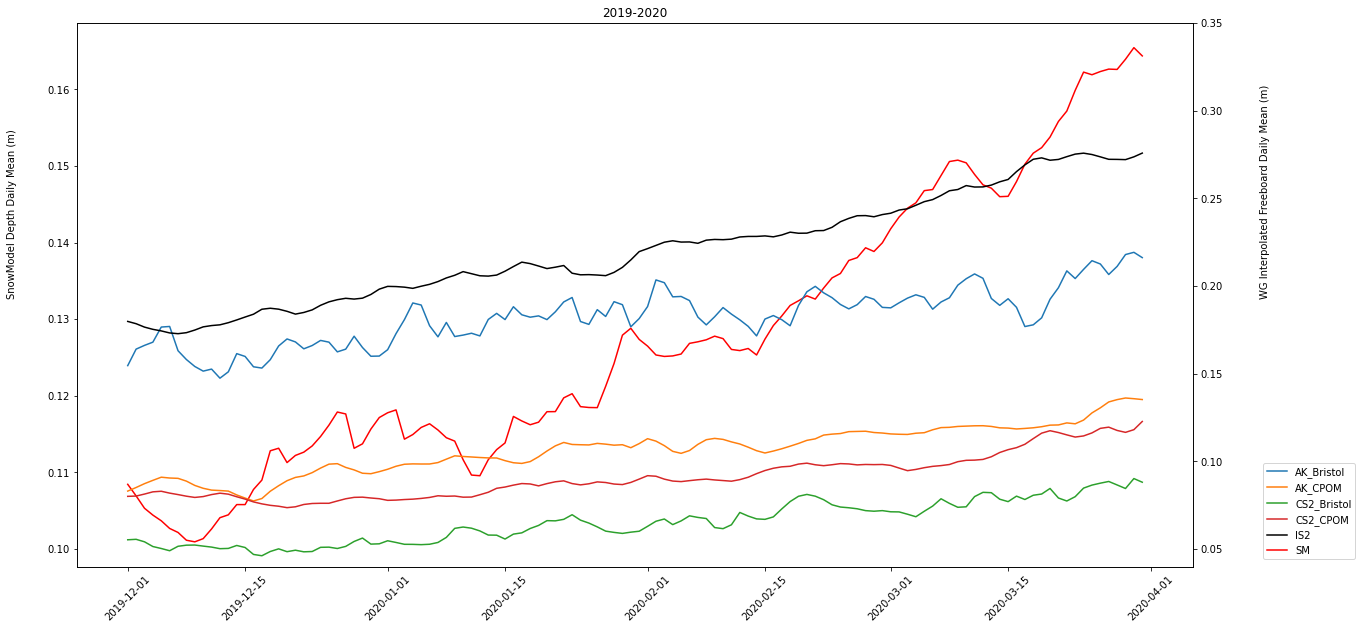

In [5]:
plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(datesten,meansten['SM_dm'],color='r')
ax1b = axs.twinx()
ax1b.plot(datesten,meansten['AK_Bristol_dm'],label='AK_Bristol')
ax1b.plot(datesten,meansten['AK_CPOM_dm'],label='AK_CPOM')
ax1b.plot(datesten,meansten['CS2_Bristol_dm'],label='CS2_Bristol')
ax1b.plot(datesten,meansten['CS2_CPOM_dm'],label='CS2_CPOM')
ax1b.plot(datesten,meansten['IS2_dm'],label='IS2',color='k')
ax1b.set_ylim([0.04, 0.35])
ax1b.plot([datesten[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-01', season.split('-')[0]+'-12-15', 
          season.split('-')[1]+'-01-01', season.split('-')[1]+'-01-15',
          season.split('-')[1]+'-02-01', season.split('-')[1]+'-02-15',
          season.split('-')[1]+'-03-01', season.split('-')[1]+'-03-15',
          season.split('-')[1]+'-04-01']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)
ax1b.legend(bbox_to_anchor = (1.15, 0.2))

fig.text(0.95, 0.5, 'WG Interpolated Freeboard Daily Mean (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Daily Mean (m)', ha='center', rotation='vertical')

# 30-day running mean

Text(0.08, 0.5, 'SnowModel Depth 30-Day Running Mean (m)')

<Figure size 432x288 with 0 Axes>

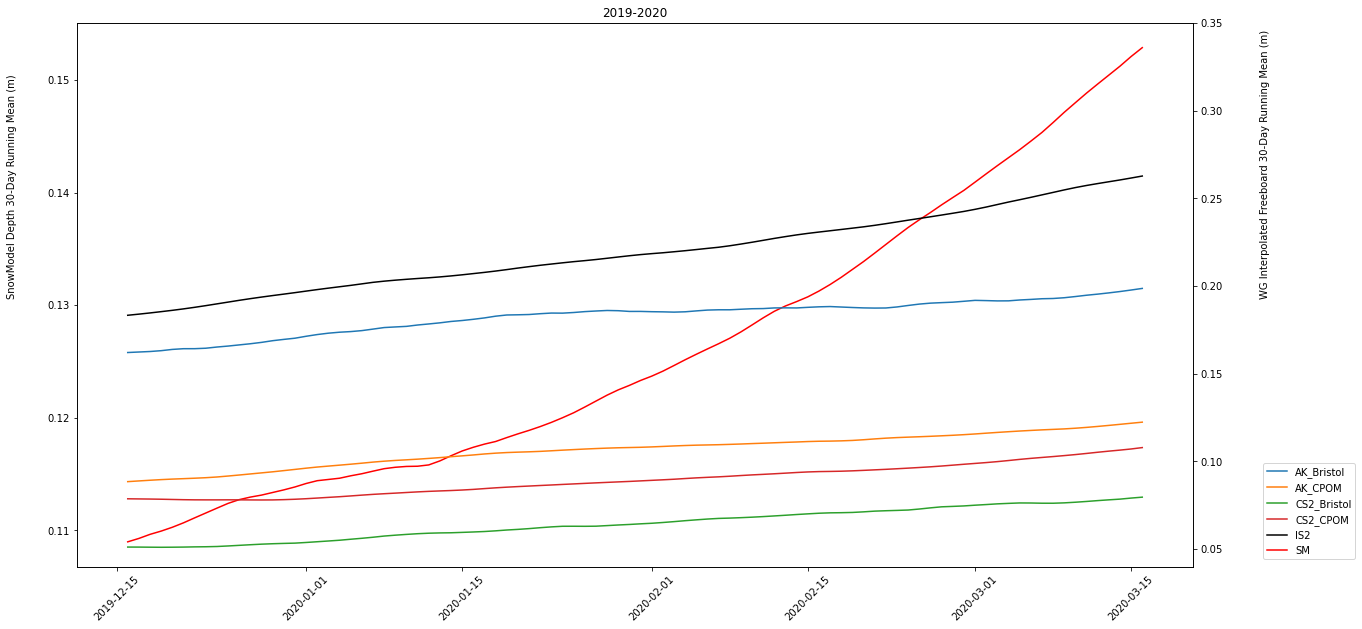

In [6]:
plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(datesten[(rm1):-(rm1)],meansten['SM_rm'][(rm1):-(rm1)],color='r')
ax1b = axs.twinx()
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_Bristol_rm'][(rm1):-(rm1)],label='AK_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_CPOM_rm'][(rm1):-(rm1)],label='AK_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_Bristol_rm'][(rm1):-(rm1)],label='CS2_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_CPOM_rm'][(rm1):-(rm1)],label='CS2_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['IS2_rm'][(rm1):-(rm1)],label='IS2',color='k')
ax1b.set_ylim([0.04, 0.35])
ax1b.plot([datesten[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)
ax1b.legend(bbox_to_anchor = (1.15, 0.2))

fig.text(0.95, 0.5, 'WG Interpolated Freeboard 30-Day Running Mean (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth 30-Day Running Mean (m)', ha='center', rotation='vertical')

# unsmoothed anomalies

Text(0.08, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

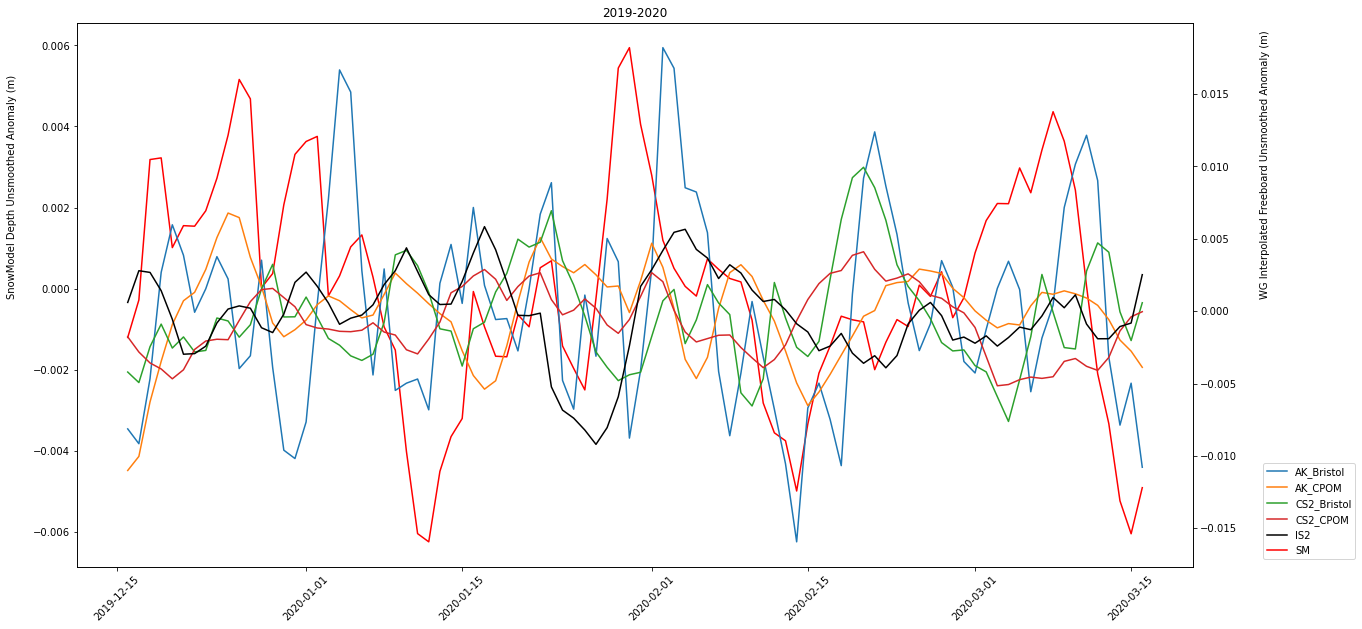

In [7]:
plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(datesten[(rm1):-(rm1)],meansten['SM_ua'][(rm1):-(rm1)][:-1],color='r')
ax1b = axs.twinx()
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_Bristol_ua'][(rm1):-(rm1)][:-1],label='AK_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_CPOM_ua'][(rm1):-(rm1)][:-1],label='AK_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_Bristol_ua'][(rm1):-(rm1)][:-1],label='CS2_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_CPOM_ua'][(rm1):-(rm1)][:-1],label='CS2_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['IS2_ua'][(rm1):-(rm1)][:-1],label='IS2',color='k')
#ax1b.set_ylim([0.04, 0.35])
ax1b.plot([datesten[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)
ax1b.legend(bbox_to_anchor = (1.15, 0.2))

fig.text(0.95, 0.5, 'WG Interpolated Freeboard Unsmoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)', ha='center', rotation='vertical')

# smoothed anomalies

Text(0.08, 0.5, 'SnowModel Depth Smoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

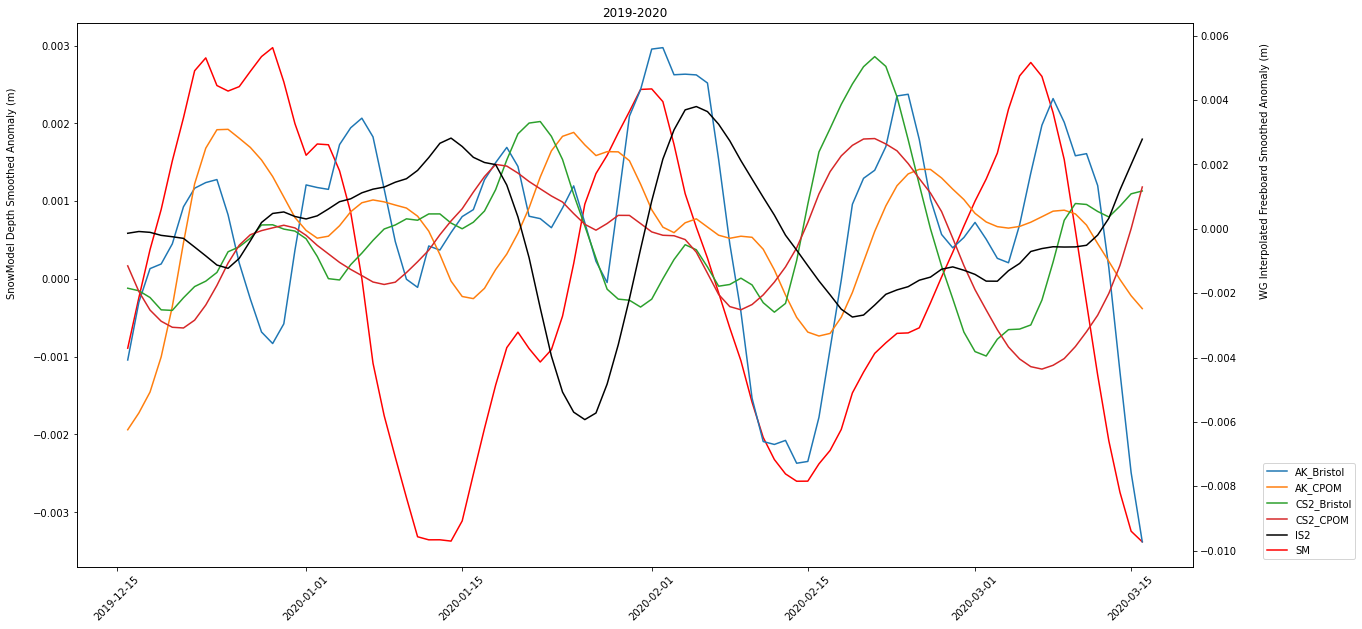

In [8]:
plt.figure()
fig, axs = plt.subplots(1,1,figsize=(20,10))

axs.plot(datesten[(rm1):-(rm1)],meansten['SM_sa'][(rm1):-(rm1)][:-1],color='r')
ax1b = axs.twinx()
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_Bristol_sa'][(rm1):-(rm1)][:-1],label='AK_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['AK_CPOM_sa'][(rm1):-(rm1)][:-1],label='AK_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_Bristol_sa'][(rm1):-(rm1)][:-1],label='CS2_Bristol')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['CS2_CPOM_sa'][(rm1):-(rm1)][:-1],label='CS2_CPOM')
ax1b.plot(datesten[(rm1):-(rm1)],meansten['IS2_sa'][(rm1):-(rm1)][:-1],label='IS2',color='k')
#ax1b.set_ylim([0.04, 0.35])
ax1b.plot([datesten[40]],[0],color='r',label='SM')

labels = [season.split('-')[0]+'-12-15', season.split('-')[1]+'-01-01',
          season.split('-')[1]+'-01-15', season.split('-')[1]+'-02-01', 
          season.split('-')[1]+'-02-15', season.split('-')[1]+'-03-01',
          season.split('-')[1]+'-03-15']
ax1b.set_title(season)
axs.set_xticklabels(labels,rotation=45)
ax1b.legend(bbox_to_anchor = (1.15, 0.2))

fig.text(0.95, 0.5, 'WG Interpolated Freeboard Smoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(0.08, 0.5, 'SnowModel Depth Smoothed Anomaly (m)', ha='center', rotation='vertical')